Homework 3 Sehyun Cho - CAP4612

In [1]:
'''
Sehyun Cho
CAP4612
10/7/2022

Learn how to evaluate the performance of a classifier (a type of supervised machine learning approach)
by measuring five evaluation metrics 
1. accuracy, 
2. precision, 
3. recall, 
4. f1 score,
5. AUC (area under curve of receiver operating characteristics (ROC) curve).

Then use these evaluation metrics to compare the performance of two classifiers, 
1. SVM (Support Vector Machine) 
2. RF (Random Forest). 

Implementation: Use built-in library for SVM and RF as well as for computing the values and plotting the evaluation metrics.

Data: Two lung cancer data, 
LUAD (Lung Adenocarcinoma)
LUSC (Lung Squamous Cell Carcinoma) with lncRNA expression values.

Positive and Negative Samples/Classes: 
To evaluate a classifier, you need both positive and negative samples. 
In general, one can convert any two-class problem into positive and negative classes. 
For the given dataset use LUAD as positive class and LUSC as negative class.
'''
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#Read csv file
csv = pd.read_csv("HW3Data_lncRNA_2_cancers.csv")

In [2]:
# Test csv
csv.head()

,Ensembl_ID,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,...,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4,Class
0,TCGA-05-4244-01A,2.979519,0.00000,1.894481,0.000000,0.094936,1.601225,0.0,0.843660,1.822328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
1,TCGA-05-4250-01A,1.761075,0.00000,1.512506,0.000000,0.063790,2.260509,0.0,1.244437,1.346487,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
2,TCGA-05-4382-01A,2.527333,0.00000,1.473132,0.080562,0.314608,1.695952,0.0,1.358939,1.413738,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
3,TCGA-05-4384-01A,2.300864,0.39099,1.507538,0.029133,2.307563,2.058446,0.0,1.158064,1.711065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD
4,TCGA-05-4389-01A,2.388600,0.00000,1.870401,0.000000,0.119019,1.681496,0.0,0.577340,1.378387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LUAD


In [3]:
# Filter column data from the second to the (last-1) column
features = csv.iloc[:,1:-1]

# Test
features.head()

,ENSG00000005206.15,ENSG00000083622.8,ENSG00000088970.14,ENSG00000099869.7,ENSG00000100181.20,ENSG00000104691.13,ENSG00000115934.11,ENSG00000117242.7,ENSG00000118412.11,ENSG00000122043.9,...,ENSGR0000185203.10,ENSGR0000223511.4,ENSGR0000223571.4,ENSGR0000226179.4,ENSGR0000230542.4,ENSGR0000234622.4,ENSGR0000236017.6,ENSGR0000236871.5,ENSGR0000237531.4,ENSGR0000270726.4
0,2.979519,0.00000,1.894481,0.000000,0.094936,1.601225,0.0,0.843660,1.822328,0.028941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.761075,0.00000,1.512506,0.000000,0.063790,2.260509,0.0,1.244437,1.346487,0.071080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.527333,0.00000,1.473132,0.080562,0.314608,1.695952,0.0,1.358939,1.413738,0.020949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.300864,0.39099,1.507538,0.029133,2.307563,2.058446,0.0,1.158064,1.711065,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.388600,0.00000,1.870401,0.000000,0.119019,1.681496,0.0,0.577340,1.378387,0.100663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Make it LUAD for positive class(1), LUSC for negative class(0), positive for 1, negative for 0
csv['Class'] = np.where(csv['Class'] == 'LUAD', 1, 0)

# Set x for the values of the above table
X = features.values

# Set y for the 'Class' column values
y = csv['Class'].values

# Fit to data which 80% training data, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size=0.20, random_state = 0)

# Test class labels are changed     
y

array([1, 1, 1, ..., 0, 0, 0])

In [5]:
# Feature scaling before applying SVM classifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#Create a SVM Classifier to mesaure evaluation metrics
clf = svm.SVC(kernel='linear', probability=True, random_state= 0)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

C:\Users\takem\AppData\Local\Temp\ipykernel_9624\1731762948.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['','LUAD', 'LUSC']);
C:\Users\takem\AppData\Local\Temp\ipykernel_9624\1731762948.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['','LUAD', 'LUSC']);


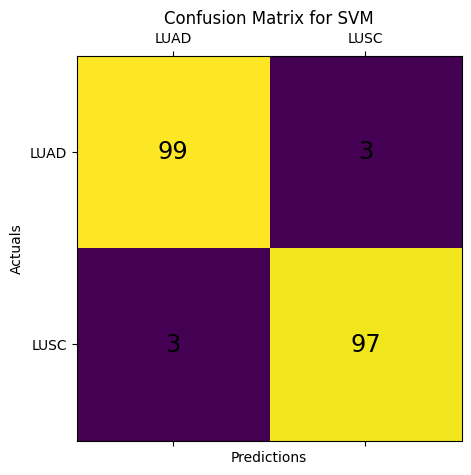

In [7]:
# Create confusion matrix for SVM
matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
ax.xaxis.set_ticklabels(['','LUAD', 'LUSC']);
ax.yaxis.set_ticklabels(['','LUAD', 'LUSC']);
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix for SVM', fontsize=12)
plt.show()

In [8]:
'''
Find out from SVC
    1. accuracy 
    2. precision
    3. recall
    4. f1 score
    5. AUC evluation score
'''
accuracy_SVM = metrics.accuracy_score(y_test, y_pred)
precision_SVM =metrics.precision_score(y_test, y_pred)
recall_SVM = metrics.recall_score(y_test, y_pred)
F1_SVM = metrics.f1_score(y_test, y_pred)
AUC_SVM = metrics.roc_auc_score(y_test, clf.predict(X_test))

# Calculate SVM evaluation metrics
print("Evaluation metrics in Support Vector Machine")
print("Accuracy: ", accuracy_SVM * 100)
print("Precision: ", precision_SVM* 100)
print("Recall: ", recall_SVM * 100)
print("F1 Score: ", F1_SVM * 100)
print("AUC evaluation: ", AUC_SVM * 100)

Evaluation metrics in Support Vector Machine
Accuracy:  97.02970297029702
Precision:  97.0
Recall:  97.0
F1 Score:  97.0
AUC evaluation:  97.02941176470588


In [9]:
# Get prediction probability from the SVM to get AUC evaluation
y_pred_probability = clf.predict_proba(np.array(X_test))[:,1]

# Create ROC curve variables
FPR, TPR, thresholds = roc_curve(y_test, y_pred_probability)

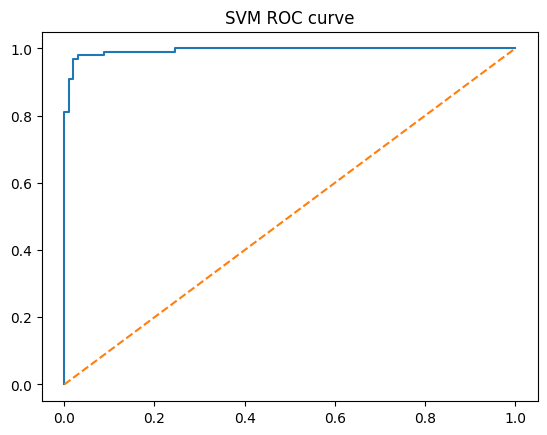

In [10]:
# Create plot for ROC curve, with information of SVM
plt.plot(FPR, TPR)

plt.plot(FPR, FPR, linestyle = '--')

RND = np.round(roc_auc_score(y_test, y_pred_probability), 2)

plt.title('SVM ROC curve');

plt.show()

In [11]:
# Create random forest classifier to measure evaluation metrics 
random_forest = RandomForestClassifier(random_state = 0)

# Take 80% for training, 20% for testing
train, test, train_label, test_label = train_test_split(X,y, train_size = 0.80 ,test_size = 0.20)

# Feature scaling before applying random forest classifier
scaler2 = StandardScaler()
train = scaler2.fit_transform(train)
test = scaler2.transform(test)

In [12]:
# Fit the data for random forest
random_forest.fit(train, train_label);

#Predict the test dataset
label_pred = clf.predict(test)

C:\Users\takem\AppData\Local\Temp\ipykernel_9624\4061430530.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['','LUAD', 'LUSC']);
C:\Users\takem\AppData\Local\Temp\ipykernel_9624\4061430530.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['','LUAD', 'LUSC']);


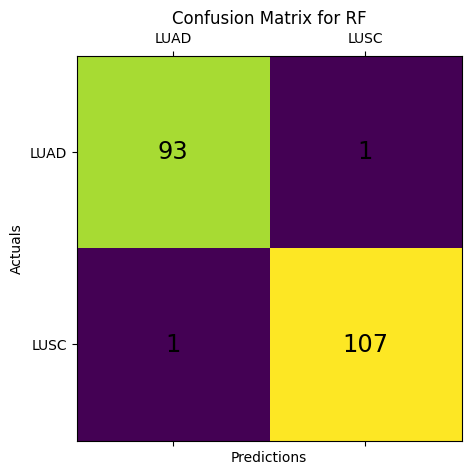

In [13]:
# Create confusion matrix for RF
matrix = confusion_matrix(y_true=test_label, y_pred=label_pred)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(matrix)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='xx-large')
ax.xaxis.set_ticklabels(['','LUAD', 'LUSC']);
ax.yaxis.set_ticklabels(['','LUAD', 'LUSC']);
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix for RF', fontsize=12)
plt.show()

In [14]:
'''
Find out from RF
    1. accuracy 
    2. precision
    3. recall
    4. f1 score
    5. AUC evluation score
'''
accuracy_RF = metrics.accuracy_score(test_label, label_pred)
precision_RF =metrics.precision_score(test_label, label_pred)
recall_RF = metrics.recall_score(test_label, label_pred)
F1_RF = metrics.f1_score(test_label, label_pred)
AUC_RF = metrics.roc_auc_score(test_label, clf.predict(test))

# Calculate evluation metrics in Random forest
print("Evaluation metrics in Random forest")
print("Accuracy: ",accuracy_RF * 100)
print("Precision: ", precision_RF * 100)
print("Recall: ", recall_RF * 100)
print("F1 Score: ", F1_RF * 100)
print("AUC evaluation: ", AUC_RF * 100)

Evaluation metrics in Random forest
Accuracy:  99.00990099009901
Precision:  99.07407407407408
Recall:  99.07407407407408
F1 Score:  99.07407407407408
AUC evaluation:  99.00512214342002


In [15]:
# Prediction probability for ROC
y_pred_probability = clf.predict_proba(np.array(test))[:,1]

FPR, TPR, thresholds = roc_curve(test_label, y_pred_probability)

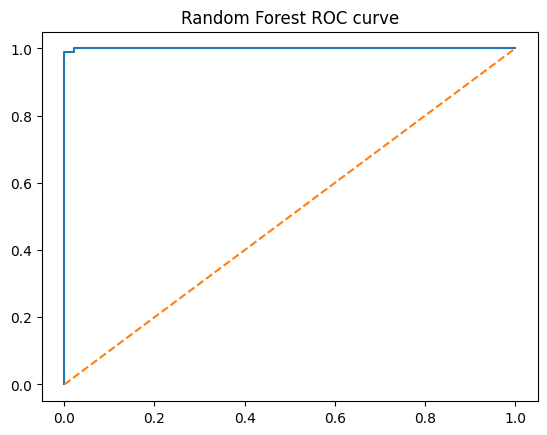

In [16]:
# Create ROC curve plot
plt.plot(FPR, TPR)

plt.plot(FPR, FPR, linestyle = '--')

plt.title('Random Forest ROC curve');

plt.show()

C:\Users\takem\AppData\Local\Temp\ipykernel_9624\1560104489.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(figure_label)


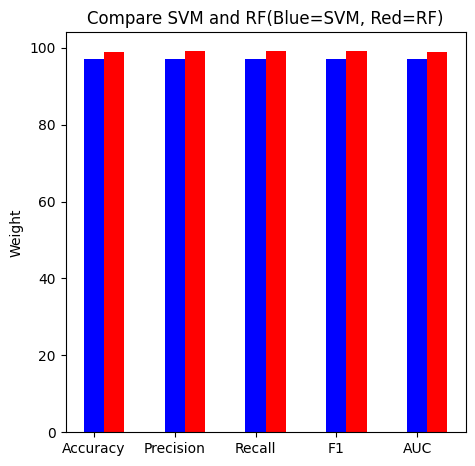

In [17]:
# Make evaluation metrics to percentage 
accuracy_SVM = accuracy_SVM * 100
precision_SVM = precision_SVM * 100
recall_SVM = recall_SVM * 100
F1_SVM = F1_SVM * 100
AUC_SVM = AUC_SVM * 100
accuracy_RF = accuracy_RF * 100
precision_RF = precision_RF * 100
recall_RF = recall_RF * 100
F1_RF = F1_RF * 100
AUC_RF = AUC_RF * 100

# Now, compare the evaluation metrics performance between SVM and Random forest
figure_evaluation = plt.figure(figsize=(4,4))
figure_label =['', 'Accuracy','Precision', 'Recall', 'F1', 'AUC']
data = [[accuracy_SVM, precision_SVM, recall_SVM, F1_SVM, AUC_SVM],
        [accuracy_RF, precision_RF, recall_RF, F1_RF, AUC_RF]]
ax = figure_evaluation.add_axes([0,0,1,1])
X = np.arange(5)
ax.set_title('Compare SVM and RF(Blue=SVM, Red=RF)')
ax.set_ylabel('Weight')
ax.bar(X + 0.00, data[0], color = 'blue', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'red', width = 0.25)
ax.set_xticklabels(figure_label)
plt.show()